In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
df = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1')

In [3]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [5]:
for i in df["OriginalTweet"][:3]:
    print(i)

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [6]:
df = df.loc[:,["OriginalTweet", "Sentiment"]]

In [7]:
df.columns = ["text", "sentiment"]

In [8]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

# Text Preprocessing

In [9]:
import nltk
import re
import string

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
df["filtered_text"] = df["text"].apply(clean_text)

In [12]:
df.head()

,text,sentiment,filtered_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...


In [13]:
from nltk.corpus import stopwords

In [14]:
stopword = stopwords.words("english")

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yahor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df["filtered_text"] = df["filtered_text"].apply(nltk.word_tokenize)

In [17]:
df.head()

,text,sentiment,filtered_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv, and, and]"
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, to, give,..."
3,My food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[me, ready, to, go, at, supermarket, during, t..."


In [18]:
def remove_stopwords(x):
    arr = []
    for word in x:
        if word not in stopword:
           arr.append(word)
    return arr

In [19]:
df["filtered_text"] = df["filtered_text"].apply(remove_stopwords)

In [20]:
df.head()

,text,sentiment,filtered_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv]"
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, outbreak, im, paranoi..."


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

In [22]:
wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer("english")

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/yahor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
def lemma(x):
    arr = []
    for word in x:
        arr.append(wordnet_lemmatizer.lemmatize(word))
    return arr

In [25]:
def stemming(x):
    arr = []
    for word in x:
        arr.append(snowball_stemmer.stem(word))
    return arr

In [26]:
def lemma_stemming(x):
    arr = lemma(x)
    arr = stemming(arr)
    return arr

In [27]:
df["lemma_text"] = df["filtered_text"].apply(lemma)

In [28]:
df["stemming_text"] = df["filtered_text"].apply(stemming)

In [29]:
df["lemma_stemming_text"] = df["filtered_text"].apply(lemma_stemming)

In [30]:
df.head()

,text,sentiment,filtered_text,lemma_text,stemming_text,lemma_stemming_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]","[menyrbi, philgahan, chrisitv]","[menyrbi, philgahan, chrisitv]"
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...","[advic, talk, neighbour, famili, exchang, phon...","[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde...","[coronavirus, australia, woolworth, give, elde...","[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empti, pleas, dont, panic, ...","[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, outbreak, im, paranoi...","[ready, go, supermarket, outbreak, im, paranoi...","[readi, go, supermarket, outbreak, im, paranoi...","[readi, go, supermarket, outbreak, im, paranoi..."


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
df["sentiment"] = le.fit_transform(df["sentiment"])

In [34]:
df.head()

,text,sentiment,filtered_text,lemma_text,stemming_text,lemma_stemming_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,"[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]","[menyrbi, philgahan, chrisitv]","[menyrbi, philgahan, chrisitv]"
1,advice Talk to your neighbours family to excha...,4,"[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...","[advic, talk, neighbour, famili, exchang, phon...","[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,4,"[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde...","[coronavirus, australia, woolworth, give, elde...","[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,4,"[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empti, pleas, dont, panic, ...","[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",0,"[ready, go, supermarket, outbreak, im, paranoi...","[ready, go, supermarket, outbreak, im, paranoi...","[readi, go, supermarket, outbreak, im, paranoi...","[readi, go, supermarket, outbreak, im, paranoi..."


In [35]:
# Example of preprocessed text
print(f"Orignal Text : {df.text[11]}")
print()
print(f"Preprocessed Text : {df.lemma_stemming_text[11]}")





We thank you for your patience during this time.

Preprocessed Text : ['due', 'situat', 'increas', 'demand', 'food', 'product', 'wait', 'time', 'may', 'longer', 'onlin', 'order', 'particular', 'beef', 'share', 'freezer', 'pack', 'thank', 'patienc', 'time']


In [122]:
# Examples of lemma_text, stemming_text and lemma_semming_text
# I want to see the difference
print(f"Lemma Text : {df.lemma_text[11]}")
print()
print(f"Stemming Text : {df.stemming_text[11]}")
print()
print(f"Lemma and Stemming Text : {df.lemma_stemming_text[11]}")

Lemma Text : ['due', 'situation', 'increased', 'demand', 'food', 'product', 'wait', 'time', 'may', 'longer', 'online', 'order', 'particularly', 'beef', 'share', 'freezer', 'pack', 'thank', 'patience', 'time']

Stemming Text : ['due', 'situat', 'increas', 'demand', 'food', 'product', 'wait', 'time', 'may', 'longer', 'onlin', 'order', 'particular', 'beef', 'share', 'freezer', 'pack', 'thank', 'patienc', 'time']

Lemma and Stemming Text : ['due', 'situat', 'increas', 'demand', 'food', 'product', 'wait', 'time', 'may', 'longer', 'onlin', 'order', 'particular', 'beef', 'share', 'freezer', 'pack', 'thank', 'patienc', 'time']


In [43]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [83]:
text = str(list([a for b in df.filtered_text.tolist() for a in b]))

In [84]:
text[:3]

"['m"

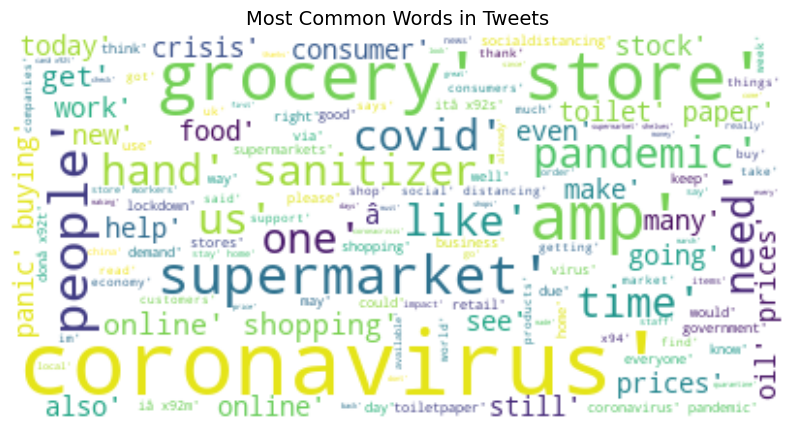

In [92]:
stopwords = set(STOPWORDS)
stopwords.add("'")
stopwords.add("`")
stopwords.add(" '")
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Tweets', loc='Center', fontsize=14)
plt.show()

In [102]:
df["clean_text"] = df["text"].apply(clean_text)

In [103]:
df["clean_text"]

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the  outb...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing  rel...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for  o...
Name: clean_text, Length: 41157, dtype: object

In [123]:
df["lemma_stemming_text"][:5]

0                       [menyrbi, philgahan, chrisitv]
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronavirus, australia, woolworth, give, elde...
3    [food, stock, one, empti, pleas, dont, panic, ...
4    [readi, go, supermarket, outbreak, im, paranoi...
Name: lemma_stemming_text, dtype: object

# Building a model

In [125]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [126]:
w2v_model = Word2Vec(sentences=df["lemma_stemming_text"], vector_size=120, window=5, min_count=1, workers=4)
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).

In [128]:
# Function to convert list of tokens to a single document embedding
def embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(embeddings, axis = 0) if embeddings else np.zeros(model.vector_size)

In [130]:
# Apply the function to each document
df['embedding'] = df['lemma_stemming_text'].apply(lambda tokens: embedding(tokens, w2v_model))

In [134]:
df.embedding[0].shape

(120,)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(
    np.vstack(df['embedding'].values), df['sentiment'], test_size=0.2, random_state=42
)


In [136]:
X_train.shape, X_test.shape

((32925, 120), (8232, 120))

## Simple decision tree

In [144]:
clf = DecisionTreeClassifier(random_state=0)

In [145]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [146]:
clf.score(X_test, y_test)

0.30563654033041787

## Simple neural network classifier

In [213]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train.to_numpy())
y_test = torch.from_numpy(y_test.to_numpy())

In [226]:
X_train[:3]

tensor([[-9.4059e-02,  3.1220e-01, -1.0123e-01,  1.7823e-01, -3.7233e-01,
          1.4620e-01,  1.7250e-01,  2.0238e-01,  2.7065e-01,  1.9851e-01,
          4.2533e-01, -1.5229e-01,  3.0462e-01, -8.8017e-01, -4.8902e-01,
          2.0569e-02, -1.7808e-01, -8.0142e-05, -3.6610e-01, -7.0564e-01,
         -2.6090e-01, -7.3476e-01,  9.7817e-01, -5.0363e-01, -3.5504e-01,
          3.2558e-01, -1.8949e-01,  7.4379e-02,  1.0801e-01, -4.4669e-01,
          1.7654e-01, -1.5265e-01,  5.5014e-01, -3.8527e-01, -3.9812e-01,
          3.5663e-01, -6.2318e-02, -2.2618e-01, -8.1905e-01,  2.8556e-01,
          1.4410e-01, -1.0119e-01, -1.1297e-01, -3.3927e-01,  1.2031e-01,
         -3.0620e-01,  1.6194e-01, -2.5174e-01, -3.5554e-01,  4.2342e-01,
         -3.3949e-01,  8.4458e-02, -7.1631e-02,  5.7180e-01,  8.2984e-02,
          1.0478e+00, -3.1146e-01, -4.8042e-01,  2.7853e-01, -6.1208e-01,
          4.3886e-01,  5.2610e-01,  5.9194e-02,  9.9217e-02, -2.1861e-01,
         -1.0961e-01,  4.5270e-02,  4.

In [241]:
X_train.shape

torch.Size([32925, 120])

In [220]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(120, 80)
        self.linear2 = nn.Linear(80, 40)
        self.linear3 = nn.Linear(40, 5)

    def forward(self, x):
        x = F.relu(self.linear1(x))      # Apply ReLU activation function
        x = F.relu(self.linear2(x))      # Apply ReLU activation function
        x = self.linear3(x)              # No activation function for the output layer
        return x

In [221]:
model = NeuralNet()

In [222]:
criterion = nn.CrossEntropyLoss()

In [223]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [224]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 1.6259
Epoch [2/10], Loss: 1.6193
Epoch [3/10], Loss: 1.6138
Epoch [4/10], Loss: 1.6094
Epoch [5/10], Loss: 1.6055
Epoch [6/10], Loss: 1.6016
Epoch [7/10], Loss: 1.5980
Epoch [8/10], Loss: 1.5946
Epoch [9/10], Loss: 1.5913
Epoch [10/10], Loss: 1.5881


In [225]:
# Evaluating the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.29


## Good Neural Network Classifier

In [238]:
class TextClassifier(nn.Module):
    def __init__(self, input_dim=120, hidden_dim=100, output_dim=5, dropout_rate=0.4):
        super(TextClassifier, self).__init__()
        
        # Bidirectional GRU layer
        self.gru = nn.GRU(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        
        # Adaptive Average Pooling layer
        self.global_avg_pooling = nn.AdaptiveAvgPool1d(1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim * 2, 64)  # *2 due to bidirectional GRU
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        # Check if the input has three dimensions (batch_size, seq_len, input_dim)
        if x.dim() != 3:
            raise ValueError(f"Expected input tensor to have 3 dimensions, but got {x.dim()}")

        # Pass input through GRU
        x, _ = self.gru(x)  # x shape: (batch_size, max_len, hidden_dim*2)
        
        # Reorder dimensions for pooling
        x = x.permute(0, 2, 1)  # New shape: (batch_size, hidden_dim*2, max_len)
        
        # Global Average Pooling
        x = self.global_avg_pooling(x)  # Output shape: (batch_size, hidden_dim*2, 1)
        x = x.squeeze(-1)  # Remove the last dimension: (batch_size, hidden_dim*2)
        
        # Fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        
        # Apply dropout
        x = self.dropout(x)
        
        # Final output layer
        x = self.fc2(x)  # Output shape: (batch_size, output_dim)
        
        # Apply log-softmax
        return F.log_softmax(x, dim=1)

In [239]:
tc = TextClassifier()

In [240]:
num_epochs = 10
for epoch in range(num_epochs):
    tc.train()
    optimizer.zero_grad()
    outputs = tc(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

ValueError: Expected input tensor to have 3 dimensions, but got 2